# Анализ категории товара на wildberries

## Цели
1) Анализ рынка для заданой категории.
2) Нахождения зависимостей между данными.
3) Изучение работы API запросов

## Исходные данные
Для своего проекта я решил спарсить данные с сайта Wildberries и проанализировать возможные зависимости между различными характеристиками товаров. В процессе работы я буду делиться гипотезами, результатами их проверки и выводами.

В данном примере я выбрал категорию "Аксессуары для телефонов". Для анализа я взял первые 100 карточек товаров, которые маркетплейс предлагает пользователю.

## Импорт библиотек

In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Париснг данных
Для парсинга данных с сайта Wildberries я нашел API-запрос, который содержит основную информацию о товарах на странице. Затем я скопировал cURL этого запроса и адаптировал его для выполнения на языке Python.


In [3]:
headers = {
    'accept': '*/*',
    'accept-language': 'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7',
    'origin': 'https://www.wildberries.ru',
    'priority': 'u=1, i',
    'referer': 'https://www.wildberries.ru/catalog/elektronika/smartfony-i-telefony/aksessuary-dlya-smartfonov',
    'sec-ch-ua': '"Chromium";v="128", "Not;A=Brand";v="24", "Opera GX";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'cross-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36 OPR/114.0.0.0',
    'x-captcha-id': 'Catalog 1|1|1735223901|AA==|4e3b96d249c34102a37b7a317695ead7|hM0tb4Sd3Af6osXSspdUTRyMnCxweLhRQNeecIlPCkl',
}

params = {
    'ab_testing': 'false',
    'appType': '1',
    'cat': '128550',
    'curr': 'rub',
    'dest': '-1257786',
    'hide_dtype': '10',
    'lang': 'ru',
    'sort': 'popular',
    'spp': '30',
}

response = requests.get('https://catalog.wb.ru/catalog/electronic20/v2/catalog', params=params, headers=headers)
with open('data.json', 'w', encoding='utf-8') as file:
    json.dump(response.json(), file)

response.json().get('data',{}).get('products',[])[0]

{'state': 0,
 'version': 2,
 'payloadVersion': 2,
 'data': {'products': [{'__sort': 119733,
    'ksort': 263,
    'time1': 2,
    'time2': 25,
    'wh': 117501,
    'dtype': 4,
    'dist': 109,
    'id': 238577586,
    'root': 214436813,
    'kindId': 0,
    'brand': 'Smart box',
    'brandId': 135714,
    'siteBrandId': 0,
    'colors': [{'name': 'белый', 'id': 16777215}],
    'subjectId': 765,
    'subjectParentId': 6258,
    'name': 'Кабель для iPhone type C - Lightning',
    'entity': 'Зарядные устройства',
    'supplier': 'Smart Shop',
    'supplierId': 4117498,
    'supplierRating': 4.5,
    'supplierFlags': 1,
    'pics': 12,
    'rating': 5,
    'reviewRating': 4.6,
    'nmReviewRating': 4.7,
    'feedbacks': 993,
    'nmFeedbacks': 775,
    'panelPromoId': 195033,
    'promoTextCard': 'ХИТЫ ГОДА',
    'promoTextCat': 'ХИТЫ ГОДА',
    'volume': 4,
    'viewFlags': 1683665,
    'sizes': [{'name': '',
      'origName': '0',
      'rank': 0,
      'optionId': 375397993,
      'wh'

## Отбор данных
В процессе парсинга было собрано множество данных, которые сложно использовать для анализа. Поэтому я выбрал из всего датасета только те поля, которые планирую анализировать дальше. Для удобства работы данные были преобразованы из формата JSON в DataFrame, так как в таком виде их проще обрабатывать и визуализировать.

In [4]:
with open("data.json", 'r') as file:
    data = json.load(file)
data

data_raw = data.get('data',{}).get('products', None)
products = []
if data_raw and len(data_raw) > 0:
    for product in data_raw:
        products.append({
            'brand': product.get('brand', None),
            'entity': product.get('entity', None),
            'name': product.get('name', None),
            'id': product.get('id', None),
            'supplier': product.get('supplier', None),
            'feedbacks': product.get('feedbacks', None),
            'rating': product.get('reviewRating', None),
            'price': (product.get('sizes', None)[0].get('price', None).get('total', None))/100,
            'quantity': product.get('totalQuantity', None)
        })
products = pd.DataFrame(products)
products

,brand,entity,name,id,supplier,feedbacks,rating,price,quantity
0,Smart box,Зарядные устройства,Кабель для iPhone type C - Lightning,238577586,Smart Shop,993,4.6,741.0,3435
1,White BОX,Зарядные устройства,Быстрая зарядка для iPhone Блок Type-C 20W Каб...,182345028,White BOX,7122,4.8,1736.0,1780
2,Borofone,Зарядные устройства,"Зарядное устройство для телефона,зарядка type-...",14747989,Мазманова Бела Артюшовна,224934,4.8,311.0,39053
3,Зарядка,Зарядные устройства,Быстрая зарядкa для iPhone 20W,155925581,Зарядка,8708,4.7,391.0,9173
4,ETTA High Tech,Зарядные устройства,Зарядка для iPhone быстрая 25w Type C Lightnin...,137724120,ETTA High Teсh,21711,4.9,914.0,5021
...,...,...,...,...,...,...,...,...,...
95,Hoco,Кабели,Кабель type-c type-c 60W для зарядки android и...,241634412,ИНДИГО,74994,4.8,364.0,3353
96,YanGoo,Кабели,Кабель type c usb для быстрой зарядки телефона...,13995368,YANGOO,65442,4.7,255.0,25966
97,McDodo,Кабели,Кабель USB Type C быстрая зарядка,13132365,MCDODO официальный магазин бренда,9632,4.8,473.0,1183
98,GQbox,Зарядные устройства,Беспроводная зарядка универсальная 3 в 1,241080377,Зарядка,961,4.8,2311.0,1451



## Очистка данных
Перед анализом и построением графиков необходимо провести очистку данных.

1) Удаление дубликатов товаров:  
Я создал отдельный датасет, в котором отсутствуют повторяющиеся наименования товаров. Это важно, поскольку дубликаты представляют один и тот же товар в разных цветах и могут исказить статистику по покупкам.

2) Удаление выбросов и низких оценок:  
Во втором датасете я убрал выбросы по количеству оценок и цене, а также удалил товары с оценками ниже 3. Такие значения не позволяют адекватно проанализировать данные и построить информативные графики.

In [5]:
products_sort = products.drop_duplicates(subset=['name'])

Q1 = products_sort['price'].quantile(0.25)
Q3 = products_sort['price'].quantile(0.75)
IQR = Q3 - Q1
products_scatter = products_sort[(products_sort['price'] >= Q1 - 1.5 * IQR) & (products_sort['price'] <= Q3 + 1.5 * IQR)]

Q1 = products_scatter['feedbacks'].quantile(0.25)
Q3 = products_scatter['feedbacks'].quantile(0.75)
IQR = Q3 - Q1
products_scatter = products_scatter[(products_scatter['feedbacks'] >= Q1 - 1.5 * IQR) & (products_scatter['feedbacks'] <= Q3 + 1.5 * IQR)]

products_scatter = products_scatter[(products_scatter['rating'] >= 3)]

products_scatter.index = range(len(products_scatter))
# mean_price = products_sort['price'].mean()
# std_price = products_sort['price'].std()

# products_sort = products_sort[(products_sort['price'] >= mean_price - 3 * std_price) & (products_sort['price'] <= mean_price + 3 * std_price)]

# mean_price = products_sort['feedbacks'].mean()
# std_price = products_sort['feedbacks'].std()

#products_sort = products_sort[(products_sort['feedbacks'] >= mean_price - 3 * std_price) & (products_sort['feedbacks'] <= mean_price + 3 * std_price)]

products_sort.index = range(len(products_sort))
products_sort

,brand,entity,name,id,supplier,feedbacks,rating,price,quantity
0,Smart box,Зарядные устройства,Кабель для iPhone type C - Lightning,238577586,Smart Shop,993,4.6,741.0,3435
1,White BОX,Зарядные устройства,Быстрая зарядка для iPhone Блок Type-C 20W Каб...,182345028,White BOX,7122,4.8,1736.0,1780
2,Borofone,Зарядные устройства,"Зарядное устройство для телефона,зарядка type-...",14747989,Мазманова Бела Артюшовна,224934,4.8,311.0,39053
3,Зарядка,Зарядные устройства,Быстрая зарядкa для iPhone 20W,155925581,Зарядка,8708,4.7,391.0,9173
4,ETTA High Tech,Зарядные устройства,Зарядка для iPhone быстрая 25w Type C Lightnin...,137724120,ETTA High Teсh,21711,4.9,914.0,5021
...,...,...,...,...,...,...,...,...,...
83,Hoco,Кабели,Кабель type-c type-c 60W для зарядки android и...,241634412,ИНДИГО,74994,4.8,364.0,3353
84,YanGoo,Кабели,Кабель type c usb для быстрой зарядки телефона...,13995368,YANGOO,65442,4.7,255.0,25966
85,McDodo,Кабели,Кабель USB Type C быстрая зарядка,13132365,MCDODO официальный магазин бренда,9632,4.8,473.0,1183
86,GQbox,Зарядные устройства,Беспроводная зарядка универсальная 3 в 1,241080377,Зарядка,961,4.8,2311.0,1451


## Визуализация данных

### 10 лучших карточек по количеству отзывов

На графике представлены топ-10 товаров по количеству отзывов. Основное внимание уделяется различным типам зарядных устройств и кабелей, в основном для устройств Apple, а также HDMI-кабелям.

/var/folders/7h/r4phw53137g2dk9y7rqz0gn80000gn/T/ipykernel_96529/84455265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feedbacks', y='name', data=top_10_products, palette='viridis')


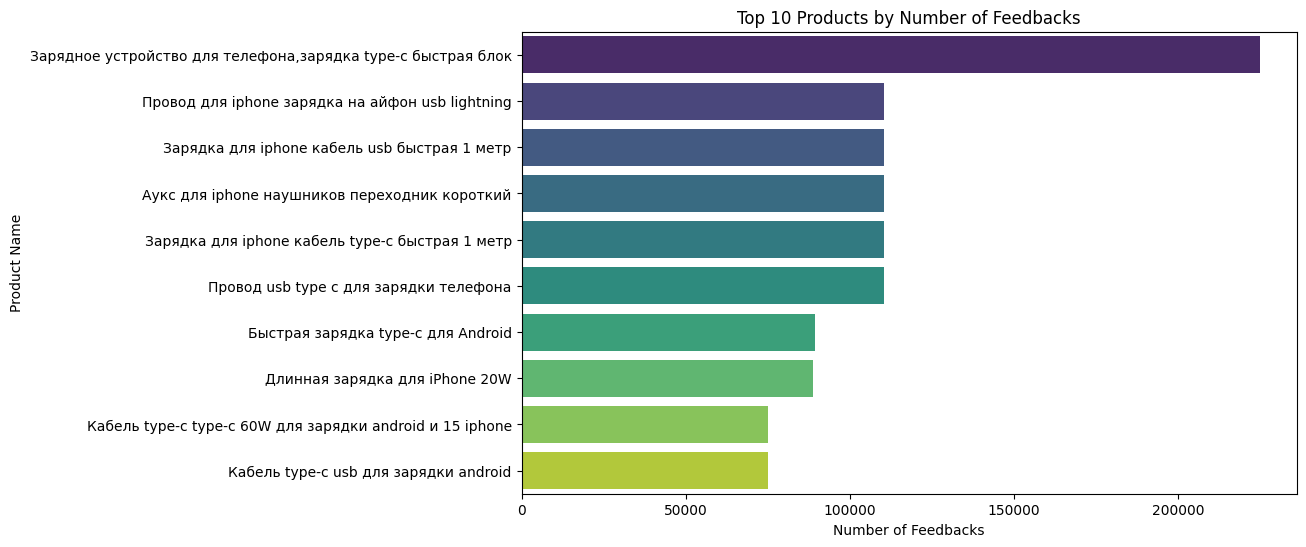

In [6]:
top_10_products = products_sort.sort_values(by='feedbacks', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='feedbacks', y='name', data=top_10_products, palette='viridis')
plt.title('Top 10 Products by Number of Feedbacks')
plt.xlabel('Number of Feedbacks')
plt.ylabel('Product Name')
plt.show()

### Вывод

Конкуренция на рынке: Наличие нескольких аналогичных товаров в топе свидетельствует о высокой конкуренции среди производителей аксессуаров для зарядки.

Большой выброс: Настолько большой отрыв от других кароточек выглядит очень подозрительно, я могу предположить, что возможно данные отзывы были накручены, но так как мы не можем отледить с какой переодичностью выходили отзывы, не представляется возможным дать объективную оценку данному выбросому.

Тренды в потреблении: Товары, связанные с зарядкой, доминируют в списке, что говорит о высоком спросе на аксессуары для мобильных устройств.

### Топ товаров по количеству отзывов

На графике представлен топ товаров на маркетплейсе. Видно, что кабели и зарядные устройства занимают лидирующие позиции, а вот адаптеры сильно отстают.

/var/folders/7h/r4phw53137g2dk9y7rqz0gn80000gn/T/ipykernel_96529/3248843934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feedbacks', y='entity', data=top_10_entities, palette='viridis')


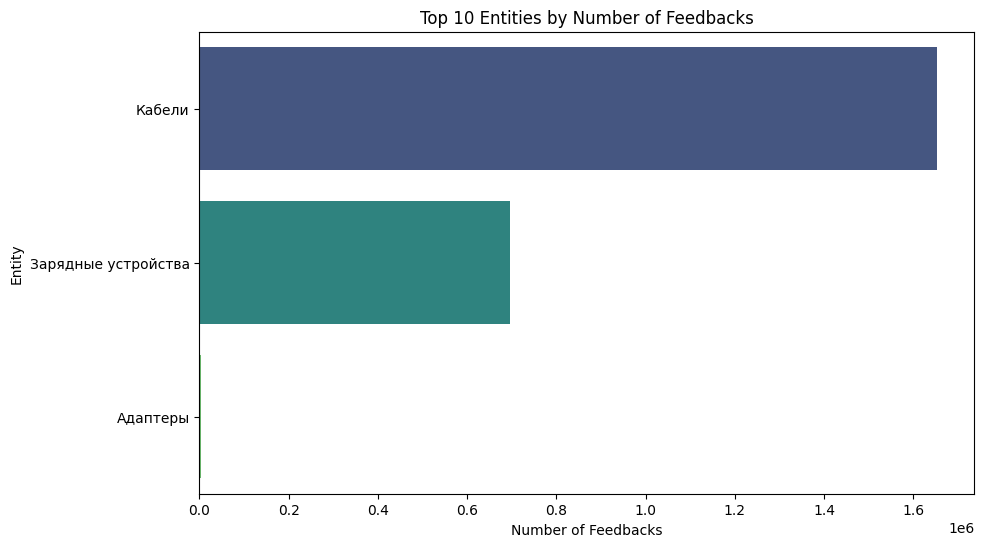

In [7]:
entity_feedback_counts = products.groupby('entity')['feedbacks'].sum().reset_index()
top_10_entities = entity_feedback_counts.sort_values(by='feedbacks', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='feedbacks', y='entity', data=top_10_entities, palette='viridis')
plt.title('Top 10 Entities by Number of Feedbacks')
plt.xlabel('Number of Feedbacks')
plt.ylabel('Entity')
plt.show()

### Вывод

Спрос на зарядные устройства: Высокое количество отзывов на зарядные устройства подтверждает их важность для пользователей, что может быть связано с ростом числа мобильных устройств и необходимости их зарядки.

Низкий интерес к адаптерам: Адаптеры, хотя и занимают третье место, имеют значительно меньшее количество отзывов, что может указывать на меньшую потребность в них по сравнению с кабелями и зарядными устройствами.

### Scatter plot распределения рейтинга в зависимости от количества отзывов

Этот график отражает взаимосвязь между рейтингом и количеством отзывов.

Цель анализа — проверить гипотезу: “Существует ли зависимость рейтинга от количества отзывов?”

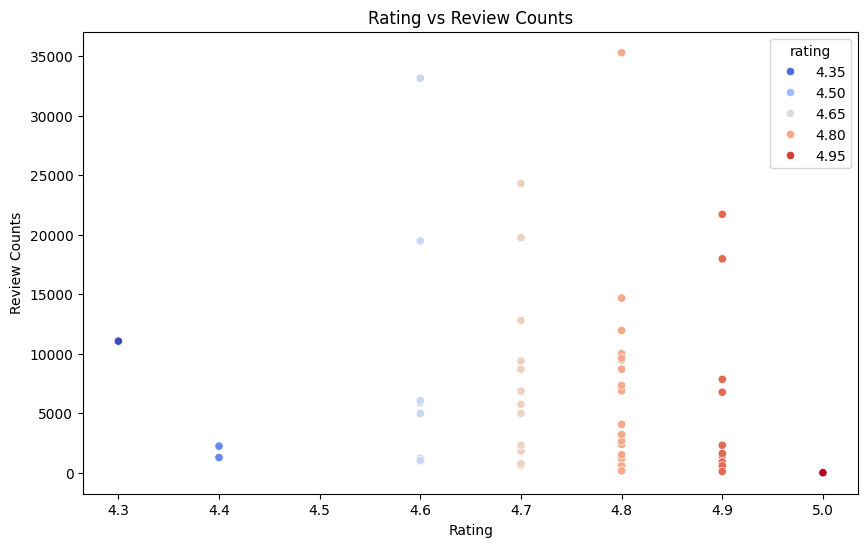

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='feedbacks', x='rating', data=products_scatter, hue='rating', palette='coolwarm')
plt.title('Rating vs Review Counts')
plt.xlabel('Rating')
plt.ylabel('Review Counts')
plt.show()

### Вывод

Можно заметить, что с возрастанием количества оценок рейтинг усредняется, что говорит нам о том что рейтинги расперделены честно.Можно заметить, что с возрастанием количества оценок рейтинг усредняется, что говорит нам о том что рейтинги расперделены честно.

### Scatter plot распределения цены от рейтинга

Данный график показывает распределние рейтинга от цены. 

Я решил проверить гипотезу: "Как зависит рейтинг от цены товара?".

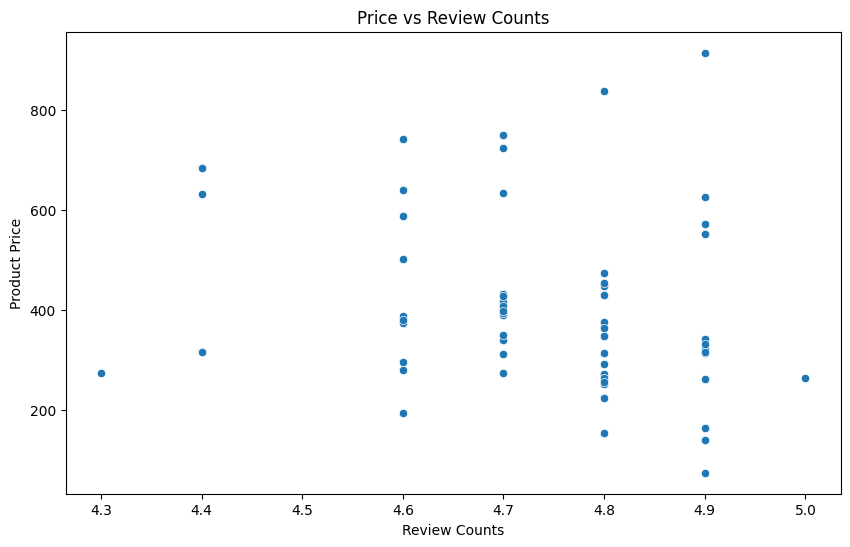

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='price', data=products_scatter)
plt.title('Price vs Review Counts')
plt.xlabel('Review Counts')
plt.ylabel('Product Price')
plt.show()

### Вывод

Как можно заметить, гипотеза оказалась неверной и зависимости никакой не наблюдается.

### Шкала для распределения количества отзывов

Данный график показывает, какое количество товаров соответсует конкретному диапозону количества отзывов. Заранее мы подготовили датасет, убрав сильные выбросы по отзывам.

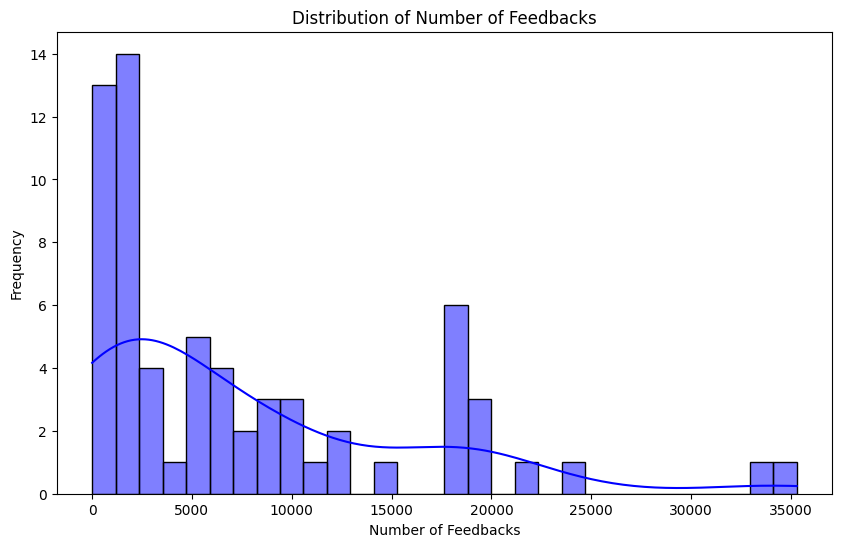

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(products_scatter['feedbacks'], bins=30, kde=True, color='blue')
plt.title('Distribution of Number of Feedbacks')
plt.xlabel('Number of Feedbacks')
plt.ylabel('Frequency')
plt.show()

### Вывод

По данному графику видно, что большинство товаров имеют минимальное количетсво отзвов. Это говорит о том, что скорее всего в данной нисше много маленьких магазинов, которых вытеснели крупные компании с рынка. От сюда можно сдлеать вывод, что заходить в данную нисшу не выгодно заходить из-за высокой конкуренции не только с маленькими продавцамими, но и с крпуными.

### Pie chart для отображения процента продавцов на маркетплейсе

Выведем распределение продовцов и проверем теорию выдвинатую в прошлом выводе.

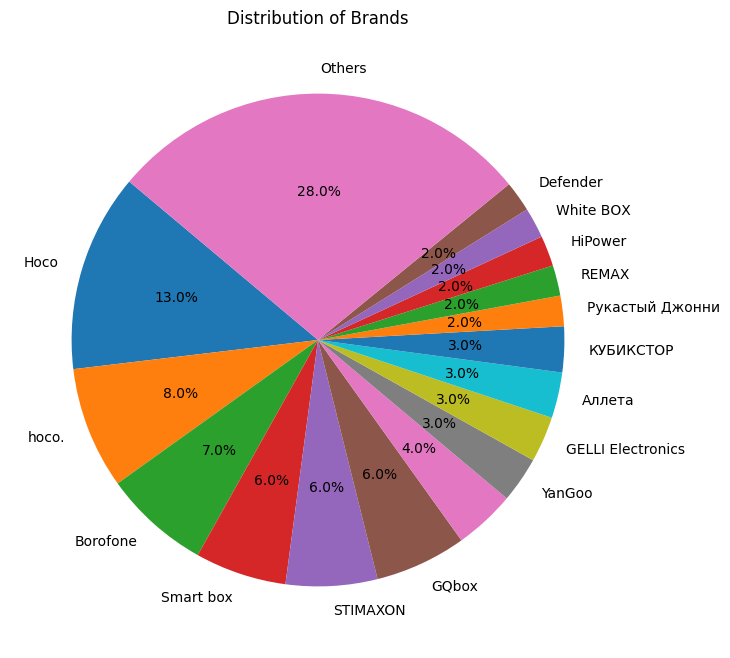

In [11]:
supplier_counts = products['brand'].value_counts()

threshold = 0.01 
others_count = supplier_counts[supplier_counts / supplier_counts.sum() <= threshold].sum()
main_suppliers = supplier_counts[supplier_counts / supplier_counts.sum() > threshold]

main_suppliers['Others'] = others_count

plt.figure(figsize=(8, 8))
plt.pie(main_suppliers, labels=main_suppliers.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Brands')
plt.show()

### Вывод
Теория была подтверждена, так как 1/3 рынка занимают мелкие компании, которые выставляются только с 1 товаром. Еще 1/3 ниши занимают крупные компании с которыми будет практически невозможно соревноваться.

### Вывод по работе

1) В ходе выполненной работы были изучены и применены современные методы парсинга данных с динамических сайтов с использованием API-запросов. Это позволило эффективно получить необходимую информацию, минуя ограничения традиционных способов парсинга.

2) Проведен анализ взаимосвязи между количеством отзывов и рейтингом, который подтвердил гипотезу о наличии зависимости. Было выявлено, что с ростом числа отзывов рейтинг стремится к усреднённому значению, что свидетельствует о сбалансированности оценок и их объективности.

3) Кроме того, был выполнен анализ рыночной ситуации в выбранной категории. На основе полученных данных сделан вывод о том, что выход на данный рынок может быть экономически нецелесообразным. Причинами такого вывода являются высокая конкуренция, низкая рентабельность и ограниченный потенциал для роста в рассматриваемом сегменте.

Таким образом, проделанная работа не только дала ценный опыт работы с динамическими данными и их анализом, но и помогла сформировать обоснованные рекомендации для принятия стратегических решений.